In [68]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [69]:
data=pd.read_csv('E:/rahul/processed_data/allBTdatasets.csv',index_col=[0])
data

,BT_6V,BT_6H,BT_10V,BT_10H,BT_18V,BT_18H,BT_36V,BT_36H,BT_89V,BT_89H,MODIS_LST,SM,VegWater,PR6,PR10,PR18,PR36,PR89
0,301.0,277.4,299.5,279.2,301.9,285.5,299.8,287.7,303.1,296.7,322.363373,0.098,0.94,0.921595,0.932220,0.945677,0.959640,0.978885
1,301.2,278.7,300.6,281.1,302.9,287.5,300.7,289.4,301.2,294.1,323.428192,0.103,1.10,0.925299,0.935130,0.949158,0.962421,0.976428
2,301.3,279.6,301.1,282.0,303.3,288.3,301.0,290.3,301.2,294.1,323.094177,0.105,1.20,0.927979,0.936566,0.950544,0.964452,0.976428
3,301.5,279.9,301.5,282.7,303.5,288.7,301.2,290.6,300.8,294.5,323.235107,0.107,1.13,0.928358,0.937645,0.951236,0.964807,0.979056
4,301.0,280.1,301.4,282.8,303.6,289.0,301.2,290.7,302.2,295.6,324.284515,0.107,1.17,0.930565,0.938288,0.951910,0.965139,0.978160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12917,303.1,282.2,303.4,285.4,305.2,294.0,303.4,296.3,300.0,298.6,322.693146,0.087,2.74,0.931046,0.940672,0.963303,0.976599,0.995333
12918,302.0,281.6,302.1,284.7,303.6,293.2,301.5,295.1,298.1,296.7,321.220734,0.098,2.97,0.932450,0.942403,0.965744,0.978773,0.995304
12919,299.9,279.2,300.1,282.4,301.6,291.3,299.1,293.0,297.1,295.9,320.268524,0.107,3.13,0.930977,0.941020,0.965849,0.979605,0.995961
12920,303.5,283.3,303.7,286.8,305.3,294.7,303.4,296.8,299.6,297.7,320.424225,0.078,2.73,0.933443,0.944353,0.965280,0.978247,0.993658


In [70]:
data['(36V-18V)^2']=(data['BT_36V']-data['BT_18V'])**2

In [71]:
# correlation matrix
correlation_matrix=data.corr()
correlation_matrix

,BT_6V,BT_6H,BT_10V,BT_10H,BT_18V,BT_18H,BT_36V,BT_36H,BT_89V,BT_89H,MODIS_LST,SM,VegWater,PR6,PR10,PR18,PR36,PR89,(36V-18V)^2
BT_6V,1.000000,0.629765,0.924506,0.537309,0.920717,0.639681,0.907612,0.724158,0.751715,0.709143,0.493265,-0.146924,-0.123934,-0.141363,-0.245351,-0.269298,-0.209745,-0.067537,0.487265
BT_6H,0.629765,1.000000,0.556008,0.839027,0.530980,0.800415,0.512280,0.743805,0.468297,0.578562,0.444420,-0.119433,0.025632,0.679843,0.488857,0.429252,0.430252,0.227722,0.306132
BT_10V,0.924506,0.556008,1.000000,0.614010,0.991048,0.725388,0.977140,0.809459,0.814308,0.788710,0.543404,-0.130610,-0.089828,-0.163555,-0.224408,-0.239571,-0.176604,-0.032511,0.524998
BT_10H,0.537309,0.839027,0.614010,1.000000,0.582325,0.958044,0.557674,0.877640,0.510473,0.678198,0.483266,-0.119668,0.093592,0.564978,0.631320,0.580108,0.580210,0.342276,0.365781
BT_18V,0.920717,0.530980,0.991048,0.582325,1.000000,0.705407,0.991466,0.798723,0.835328,0.795253,0.549042,-0.113240,-0.124163,-0.192117,-0.254774,-0.277659,-0.216169,-0.060651,0.496288
BT_18H,0.639681,0.800415,0.725388,0.958044,0.705407,1.000000,0.692849,0.969951,0.576311,0.783355,0.451136,-0.074419,0.239013,0.418486,0.470006,0.485025,0.523594,0.421293,0.352027
BT_36V,0.907612,0.512280,0.977140,0.557674,0.991466,0.692849,1.000000,0.803526,0.855743,0.816145,0.553367,-0.077379,-0.096041,-0.204072,-0.271879,-0.284486,-0.221692,-0.059569,0.381723
BT_36H,0.724158,0.743805,0.809459,0.877640,0.798723,0.969951,0.803526,1.000000,0.671955,0.861716,0.475352,-0.036783,0.250673,0.265554,0.287741,0.328781,0.402290,0.389034,0.290954
BT_89V,0.751715,0.468297,0.814308,0.510473,0.835328,0.576311,0.855743,0.671955,1.000000,0.870376,0.668231,-0.019418,-0.277622,-0.113293,-0.170570,-0.249856,-0.215448,-0.233963,0.230388
BT_89H,0.709143,0.578562,0.788710,0.678198,0.795253,0.783355,0.816145,0.861716,0.870376,1.000000,0.534949,0.004904,0.085312,0.068389,0.061983,0.080515,0.156725,0.275053,0.193029


In [72]:
y0=data['MODIS_LST']
x0=data[["BT_6V","BT_6H","BT_10V","BT_10H","BT_18V","BT_18H","BT_36V","BT_36H","BT_89V","BT_89H","(36V-18V)^2"]]

y=y0[:8000]
x1=x0[:8000]

In [73]:
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              MODIS_LST   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     1071.
Date:                Thu, 01 Jul 2021   Prob (F-statistic):               0.00
Time:                        10:22:11   Log-Likelihood:                -19526.
No. Observations:                8000   AIC:                         3.908e+04
Df Residuals:                    7988   BIC:                         3.916e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          37.1295      3.589     10.346      0.000      30.094      44.165
BT_6V          -0.1916      0.027     -7.213      0.000      -0.244      -0.140
BT_6H           0.0475      0.016      2.994      0.003       0.016       0.079
BT_10V         -0.7792      0.078     -9.959      0.000      -0.933      -0.626
BT_10H          1.0787      0.063     17.118      0.000       0.955       1.202
BT_18V         -0.6760      0.388     -1.744      0.081      -1.436       0.084
BT_18H         -1.7457      0.127    -13.724      0.000      -1.995      -1.496
BT_36V          1.9102      0.391      4.890      0.000       1.144       2.676
BT_36H          0.5974      0.111      5.400      0.000       0.381       0.814
BT_89V          0.8753      0.039     22.227      0.000       0.798       0.953
BT_89H         -0.1658      0.036     -4.596      0.000      -0.236      -0.095
(36V-18V)^2     0.3478      0.090      3.847      0.000       0.171       0.525
==============================================================================
Omnibus:                     2632.874   Durbin-Watson:                   0.557
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18068.311
Skew:                          -1.402   Prob(JB):                         0.00
Kurtosis:                       9.807   Cond. No.                     1.09e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
# coeffiecients
A0=37.1295
A6V=-0.1916
A6H=0.0475
A10V=-0.7792
A10H=1.0787
A18V=-0.6760
A18H=-1.7457
A36V=1.9102
A36H=0.5974
A89V=0.8753
A89H=-0.1658
Adiff=0.3478


In [80]:
LST=A0+A6V*data['BT_6V'][8000:]+A6H*data['BT_6H'][8000:]+A10V*data['BT_10V'][8000:]+A10H*data['BT_10H'][8000:]+A18V*data['BT_18V'][8000:]+A18H*data['BT_18H'][8000:]+A36V*data['BT_36V'][8000:]+A36H*data['BT_36H'][8000:]+A89V*data['BT_89V'][8000:]+A89H*data['BT_89H'][8000:]+Adiff*data['(36V-18V)^2'][8000:]

In [81]:
error=data['MODIS_LST'][8000:]-LST

In [82]:
error

8000     -0.679807
8001     -3.674617
8002     -5.462742
8003    -18.980282
8004     -0.473220
           ...    
12917     7.559114
12918     8.455796
12919     9.410734
12920     5.101267
12921     7.110792
Length: 4922, dtype: float64

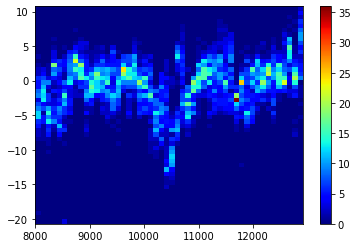

In [83]:
plt.hist2d(data[8000:].index.values,error, (50, 50), cmap=plt.cm.jet)
plt.colorbar()

In [56]:
df=pd.DataFrame({})
df['MODIS_LST']=data['MODIS_LST'][8000:]
df['Predicted_LST']=LST
df['Error']=error

In [57]:
df.describe()

,MODIS_LST,Predicted_LST,Error
count,4922.000000,4922.000000,4922.000000
mean,319.987498,320.746967,-0.759470
std,4.176067,3.369277,3.567870
min,305.191925,308.673470,-20.733721
25%,317.229706,318.514409,-2.799397
50%,320.252533,320.895863,-0.309697
75%,323.014832,323.091771,1.556657
max,332.012756,342.785378,10.747550


In [58]:
df.corr()

,MODIS_LST,Predicted_LST,Error
MODIS_LST,1.000000,0.570771,0.631464
Predicted_LST,0.570771,1.000000,-0.276271
Error,0.631464,-0.276271,1.000000


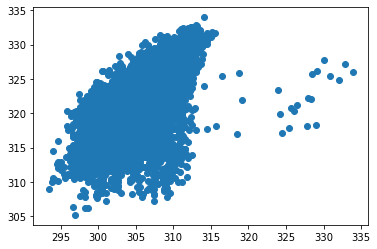

In [63]:
plt.scatter(data['BT_89V'],data["MODIS_LST"])

In [61]:
s=df[(df["Error"]>3) |(df['Error']<-3)]

In [62]:
s

,MODIS_LST,Predicted_LST,Error
8001,323.075745,326.750362,-3.674617
8002,321.081238,326.543980,-5.462742
8003,317.020996,336.001278,-18.980282
8006,323.410461,327.180062,-3.769601
8007,317.089935,323.597778,-6.507843
...,...,...,...
12917,322.693146,315.134032,7.559114
12918,321.220734,312.764938,8.455796
12919,320.268524,310.857790,9.410734
12920,320.424225,315.322958,5.101267


In [37]:
d= df.apply(lambda x : True
            if (x['Error'] <5.0 and x['Error']>-5.0) else False, axis = 1)
  
# Count number of True in the series
num_rows = len(d[d == True].index)

In [38]:
num_rows

4211

# Decision Tree

In [39]:
 from sklearn import tree

In [40]:
clf = tree.DecisionTreeRegressor()
clf = clf.fit(x1, y)

In [43]:
y_hat=clf.predict(x0[8000:])

In [44]:
error=y0[8000:]-y_hat

In [45]:
df=pd.DataFrame({})
df['MODIS_LST']=y0[8000:]
df['Predicted_LST']=y_hat
df['Error']=error
df.describe()

,MODIS_LST,Predicted_LST,Error
count,4922.000000,4922.000000,4922.000000
mean,319.987498,321.601894,-1.614396
std,4.176067,4.257943,4.851545
min,305.191925,308.844513,-20.568481
25%,317.229706,318.563400,-4.527458
50%,320.252533,321.844360,-1.334457
75%,323.014832,324.498108,1.659508
max,332.012756,332.305786,13.047028


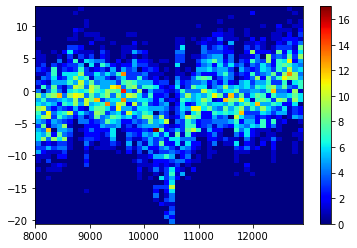

In [46]:
plt.hist2d(data[8000:].index.values,error, (50, 50), cmap=plt.cm.jet)
plt.colorbar()